# Sentiment Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('data_clean.csv')
df

,index,Name,Time,Store,Comment
0,0,Lisa Shen,08-03-2020,Amazon Go,every introvert dream
1,1,WTFIWFYDB,09-03-2020,Amazon Go,not really lot people inside regardless online...
2,3,John Miller,10-03-2020,Amazon Go,laugh loud exactly
3,6,John Miller,10-03-2020,Amazon Go,talk
4,7,Soundwave,11-03-2020,Amazon Go,win change anything introvert already self che...
...,...,...,...,...,...
223262,268230,Lindseypatterson123,02/11/2022,Smart Cart,ok smart cart cancel just girl
223263,268231,Hannah Thomas,02/11/2022,Smart Cart,okay thank
223264,268232,Hannah Thomas,02/11/2022,Smart Cart,actual reason want able steal peace kelvin kufley
223265,268234,Kelvin_kufley,02/11/2022,Smart Cart,cause steal


In [4]:
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
#calculate the sentiment score for each comment
df['sentiment_score'] = df['Comment'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

def analysis(score):
  
  polarity = "neutral"

  if(score['compound']>= 0.05):
    polarity = "positive"

  elif(score['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  score = sent_analyzer.polarity_scores(text)
  return analysis(score)

# Run the predictions
df["polarity"] = df["Comment"].apply(predict_sentiment)

# Show 5 random rows of the data
df

,index,Name,Time,Store,Comment,sentiment_score,polarity
0,0,Lisa Shen,08-03-2020,Amazon Go,every introvert dream,0.2500,positive
1,1,WTFIWFYDB,09-03-2020,Amazon Go,not really lot people inside regardless online...,0.4588,positive
2,3,John Miller,10-03-2020,Amazon Go,laugh loud exactly,0.5574,positive
3,6,John Miller,10-03-2020,Amazon Go,talk,0.0000,neutral
4,7,Soundwave,11-03-2020,Amazon Go,win change anything introvert already self che...,0.5859,positive
...,...,...,...,...,...,...,...
223262,268230,Lindseypatterson123,02/11/2022,Smart Cart,ok smart cart cancel just girl,0.4404,positive
223263,268231,Hannah Thomas,02/11/2022,Smart Cart,okay thank,0.5267,positive
223264,268232,Hannah Thomas,02/11/2022,Smart Cart,actual reason want able steal peace kelvin kufley,0.1531,positive
223265,268234,Kelvin_kufley,02/11/2022,Smart Cart,cause steal,-0.4939,negative


<AxesSubplot:title={'center':'Sentiment Analysis'}>

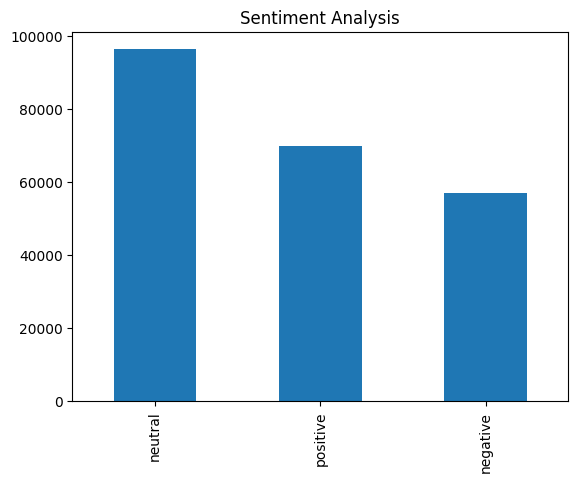

In [ ]:
#count the number of positive, negative and neutral comments and plot them
df['polarity'].value_counts().plot(kind='bar', title='Sentiment Analysis')
